In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Select the Right Threshold values using ROC Curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc curve
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000, n_classes=2,weights=[1,1], random_state=1) 

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forests

In [12]:
# Apply RandomForestClasifier

from sklearn.ensemble import RandomForestClassifier 
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'. format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred=rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'. format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9850055555555556


In [13]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.26, 0.74]])

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNN Classifer

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(x_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


### Now we will focus on selecting the best threshold for maximum accuracy

In [21]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9854222222222222


In [22]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.60,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [24]:
final_prediction

0      0.880262
1      0.118323
2      0.821283
3      0.755353
4      0.567447
         ...   
595    0.123840
596    0.117845
597    0.876697
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [25]:
### Calculate the ROC Curve

fpr,tpr,thresholds=roc_curve(y_test,final_prediction)
thresholds

array([1.91172166, 0.91172166, 0.91156694, 0.91077475, 0.7969465 ,
       0.79662833, 0.78735188, 0.78571156, 0.78567698, 0.7855558 ,
       0.7558411 , 0.75537124, 0.72210041, 0.72137362, 0.70749037,
       0.70393711, 0.64488185, 0.64243537, 0.63707293, 0.60925354,
       0.60616701, 0.60236186, 0.59146627, 0.59114346, 0.56292732,
       0.56050386, 0.55105932, 0.53377948, 0.50865858, 0.48366892,
       0.4346034 , 0.37905357, 0.37629719, 0.35386723, 0.35086612,
       0.23969741, 0.23640421, 0.20852808, 0.20598417, 0.12301207,
       0.1228351 , 0.10726499])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.434603,0.961667
26,0.551059,0.960000
25,0.560504,0.960000
29,0.483669,0.958333
27,0.533779,0.958333


In [27]:
accuracy_ls

,thresholds,accuracy
30,0.434603,0.961667
26,0.551059,0.960000
25,0.560504,0.960000
29,0.483669,0.958333
27,0.533779,0.958333
24,0.562927,0.958333
28,0.508659,0.956667
31,0.379054,0.948333
32,0.376297,0.946667
23,0.591143,0.945000


In [28]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

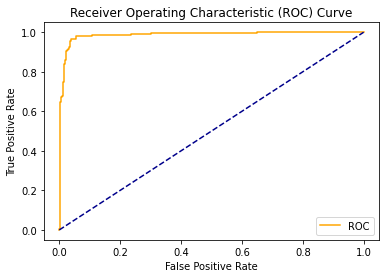

In [29]:
plot_roc_curve(fpr,tpr)